In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

import concave_enclosed_csf_list
import _image_processing
import _image_curve

In [19]:
import importlib
importlib.reload(concave_enclosed_csf_list)

<module 'concave_enclosed_csf_list' from 'C:\\Users\\ghage\\PycharmProjects\\enclosedcurveshorteningflow\\concave_enclosed_csf_list.py'>

In [7]:
sil_path = r"C:\Users\ghage\PycharmProjects\enclosedcurveshorteningflow\lib\silhouettes\geographic"

In [8]:
sil_files = os.listdir(sil_path)

In [9]:
images = [_image_processing.load_image(os.path.join(sil_path, file)) for file in sil_files]

In [12]:
open_images = [_image_processing.open_image(image, 5) for image in images]

In [13]:
image_curves = [_image_curve.ImageCurve(image).curve() for image in open_images]

In [20]:
ecsf = concave_enclosed_csf_list.ConcaveEnclosedCSFList(image_curves[0])

In [21]:
ecsf.run()

Iteration: 0, Concavity:  1423.08, Area to original %:  100.00
Iteration: 100, Concavity:  30.70, Area to original %:  91.33
Iteration: 200, Concavity:  23.24, Area to original %:  83.65
Iteration: 300, Concavity:  17.26, Area to original %:  76.31
Iteration: 400, Concavity:  12.65, Area to original %:  69.46
Iteration: 500, Concavity:  10.78, Area to original %:  62.97
Iteration: 600, Concavity:  9.65, Area to original %:  56.66
Iteration: 700, Concavity:  8.47, Area to original %:  50.46
Iteration: 800, Concavity:  6.47, Area to original %:  44.13
Iteration: 900, Concavity:  4.23, Area to original %:  36.55
Iteration: 1000, Concavity:  3.73, Area to original %:  28.83
Iteration: 1100, Concavity:  3.64, Area to original %:  21.66
Iteration: 1200, Concavity:  3.57, Area to original %:  14.90
Iteration: 1300, Concavity:  3.51, Area to original %:  8.77
Iteration: 1400, Concavity:  3.48, Area to original %:  3.39
Iteration: 1500, Concavity:  3.45, Area to original %:  1.46
Iteration: 160

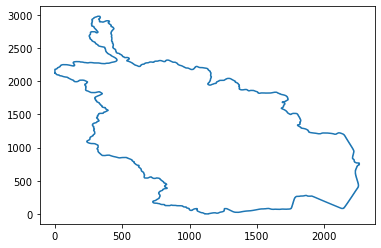

In [26]:
_ = [plt.plot(*curve.transpose()) for curve in ecsf.curves[:1]]

In [27]:
len(ecsf.curves)

18